<a href="https://colab.research.google.com/github/ANNU12344/Coivd-detection/blob/main/covid-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir my_project1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1/255,horizontal_flip= True,zoom_range=0.2,shear_range=0.2)
train_data=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Train",target_size=(256,256),batch_size=16,class_mode='binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_datagen = image.ImageDataGenerator(rescale=1/255)
test_data=test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Val",target_size=(256,256),batch_size=16,class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['acc'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
history=model.fit_generator(train_data,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data= test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
8/8 [==============================] - 72s 9s/step - loss: 0.8189 - acc: 0.6328 - val_loss: 0.6754 - val_acc: 0.9375
Epoch 2/10
8/8 [==============================] - 60s 7s/step - loss: 0.5548 - acc: 0.7031 - val_loss: 0.4816 - val_acc: 0.8750
Epoch 3/10
8/8 [==============================] - 63s 8s/step - loss: 0.3698 - acc: 0.8203 - val_loss: 0.3618 - val_acc: 0.9375
Epoch 4/10
8/8 [==============================] - 61s 8s/step - loss: 0.3002 - acc: 0.8984 - val_loss: 0.1265 - val_acc: 0.9375
Epoch 5/10
8/8 [==============================] - 65s 8s/step - loss: 0.3268 - acc: 0.9141 - val_loss: 0.2457 - val_acc: 0.9375
Epoch 6/10
8/8 [==============================] - 58s 7s/step - loss: 0.2373 - acc: 0.9141 - val_loss: 0.1662 - val_acc: 0.9688
Epoch 7/10
8/8 [==============================] - 60s 8s/step - loss: 0.2226 - acc: 0.9141 - val_loss: 0.1435 - val_acc: 1.0000
Epoch 8/10
8/8 [==============================] - 63s 8s/step - loss: 0.1515 - acc: 0.9688 - val_loss: 0

In [ ]:
 model.save("Covid.h5")

In [ ]:
acc=model.evaluate_generator(generator=test_data)[1]
print(f"The accuracy of your model is ={acc} %")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is =0.9666666388511658 %


In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = tf.keras.utils.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img
  

In [ ]:
class_type = {0:'Covid',  1 : 'Normal'}

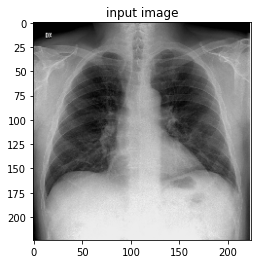

AttributeError: ignored

In [ ]:
from tensorflow.keras.preprocessing import image
path = "/content/drive/MyDrive/Lung.jpeg"     
img = image.load_img(path, target_size=(224,224,3))
img = image.img_to_array(img)/255
img = np.expand_dims(img , axis= 0 )
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()
prediction = history.predict(img)
prediction
rounded_prediction = np.argmax(prediction, axis=-1)
if rounded_prediction == 1:
    print("Covid Negative")
elif rounded_prediction == 0:
    print("Covid Positive")
elif rounded_prediction == 2:
    print("Normal")

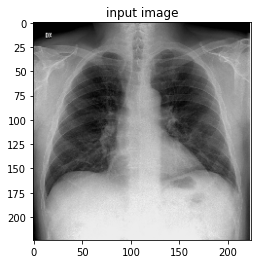

ValueError: ignored

In [ ]:
from tensorflow.keras.preprocessing import image
path = "/content/drive/MyDrive/Lung.jpeg"     
img = image.load_img(path, target_size=(224,224,3))
img = image.img_to_array(img)/255
img = np.expand_dims(img , axis= 0 )
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()
import tensorflow as tf
import numpy as np
res = class_type[np.argmax(model.predict(img),axis=-1)]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")
print("Image not found")



In [ ]:
model.save("covid.h5")
import keras as tf
mymodel=tf.models.load_model("/content/Covid.h5")

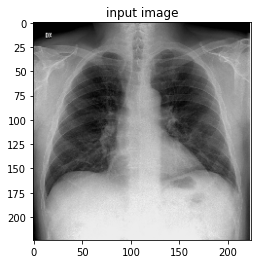

ValueError: ignored

In [ ]:
from tensorflow.keras.preprocessing import image
path = "/content/drive/MyDrive/Lung.jpeg"     
img = image.load_img(path, target_size=(224,224))
img = image.img_to_array(img)/255
img = np.expand_dims(img , axis= 0 )
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()
y_pred = model.predict(img)
if y_pred[0][0]==1:
  print("Covid Negative")
else:
  print("Covid negative")

  


In [ ]:
import cv2
  
# path
path = r'/content/drive/MyDrive/lena_color.tiff'
  
# Reading an image in grayscale mode
image = cv2.imread(path, 0)
  
# Window name in which image is displayed

  
# Using cv2.imshow() method
# Displaying the image
cv2.namedWindow("Display", cv2.WINDOW_AUTOSIZE)
cv2.imshow('Display', image)
  
# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)
  
# closing all open windows
cv2.destroyAllWindows()